<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.
### Input Layer:
The layer that takes in the input to a network/perceptron.
### Hidden Layer: 
The layers that sit between input and output layers and do not see anything outside.
### Output Layer:
The last layer that outputs the numbers or making inferences.
### Neuron:
A neuron is a perceptron that takes a weighted sum of the inputs, add bias, and pass through an activation function to determine if it passes information to the next stage, with output = activation_function(WX + b).
### Weight:
The matrix that transforms inputs to a neuron into another shape.
### Activation Function:
An activation function transforms a matrix into a desirable shape for the output. The common activation functions are sigmoid, tanh, leaky ReLU, etc. And for regression problems the activation function is just a pass through, e.g., no activation function.
### Node Map:
A node map is a graph of a neural network with different nodes representing different operations.
### Perceptron:
A perceptron is a single layer of neuron.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here
```
inputs -->(X)--->(+)--->(activation function)----> output
weights --/      /
bias ----------/
```

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(45)

In [2]:
x1 = np.array([0, 1, 0, 1])
x2 = np.array([0, 0, 1, 1])
y = np.array([[1], [1], [1], [0]])
X = np.vstack([x1, x2]).T
print(X.shape, y.shape)

(4, 2) (4, 1)


In [3]:
##### Your Code Here #####
class Perceptron():
    def __init__(self, input_dim = 2, output_dim = 1, lr=0.1, iterations=2000):
        self.lr = lr
        self.iterations = iterations

        # initiailize weights
        self.w = np.random.randn(input_dim, output_dim) 
        self.b = np.zeros(output_dim)
        self.loss = []
        pass
        
    def sigmoid(self, x):
        """
        A numerically stable version of the logistic sigmoid function.
        """
        pos_mask = (x >= 0)
        neg_mask = (x < 0)
        z = np.zeros_like(x)
        z[pos_mask] = np.exp(-x[pos_mask])
        z[neg_mask] = np.exp(x[neg_mask])
        top = np.ones_like(x)
        top[neg_mask] = z[neg_mask]
        return top / (1 + z)

    def dsigmoid(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def affine_forward(self, x, w, b):
        scores = x.dot(w) + b
        cache = (x, w, b)
        return scores, cache
    
    def affine_backward(self, dout, cache):
        x, w, b = cache
        dx = dout.dot(w.T)
        dw = x.reshape(-1, 1).dot(dout.reshape(-1, 1))
        db = np.sum(dout, axis=0)
        return dx, dw, db
        
    def fit(self, x, y):
        for i in range(self.iterations):            
            for j in range(x.shape[0]):
                # forward prop
                scores, cache = self.affine_forward(x[j], self.w, self.b)
                
                # scoring
                out = self.sigmoid(scores)
                loss = y[j] - out.reshape(-1,)
                self.loss.append(loss)
                
                # back prop
                dout = loss * self.dsigmoid(out)
                _, dw, db = self.affine_backward(dout.reshape(-1,), cache)
        
                # gradient update
                self.w += dw
                self.b += db
        pass
        
    def predict(self, x):
        return self.sigmoid(self.affine_forward(x, self.w, self.b)[0])

In [4]:
nand = Perceptron(input_dim = 2, output_dim = 1)
nand.fit(X, y)

In [5]:
nand.w, nand.b

(array([[-8.62142225],
        [-8.62454379]]), array([12.98056053]))

In [6]:
test1 = np.array([0, 0])
test2 = np.array([0, 1])
test3 = np.array([1, 0])
test4 = np.array([1, 1])
print(f"{test1} {nand.predict(test1)}")
print(f"{test2} {nand.predict(test2)}")
print(f"{test3} {nand.predict(test3)}")
print(f"{test4} {nand.predict(test4)}")

[0 0] [0.9999977]
[0 1] [0.98733312]
[1 0] [0.9873721]
[1 1] [0.01385161]


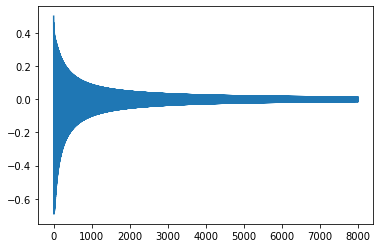

In [7]:
plt.plot(nand.loss);

In [8]:
x11 = np.array([0, 1, 0, 1])
x21 = np.array([0, 0, 1, 1])
# y1 = np.array([[1], [1], [1], [0]])
y1 = [[1], [1], [1], [0]]
X1 = np.vstack([x1, x2]).T
# print(X1.shape, y1.shape)

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [10]:
# weights initializations
weights = 2*np.random.random((2, 1)) - 1
b = np.zeros(X1.shape[0])
print(weights.shape, b.shape)

(2, 1) (4,)


In [11]:
print(f"weights before training {weights}, biases before training {b}")

weights before training [[-0.4371054 ]
 [-0.84542087]], biases before training [0. 0. 0. 0.]


In [12]:
for iteration in range(5000):
    weighted_sum = X1.dot(weights) + b.reshape(-1,1)
    activated_output = sigmoid(weighted_sum)
    error = y1 - activated_output
    adjustments = error * sigmoid_derivative(activated_output)
    weights += X1.T.dot(adjustments)
    b += np.sum(adjustments, axis=1)

In [13]:
print(f"Weights after training {weights}")
print(f"Output after training {activated_output}")

Weights after training [[-0.11820946]
 [-0.32236764]]
Output after training [[9.98981245e-01]
 [9.98980698e-01]
 [9.98980697e-01]
 [8.02073797e-04]]


In [14]:
y1

[[1], [1], [1], [0]]

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [15]:
##### Your Code Here #####
url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv"
df = pd.read_csv(url)
df.shape

(768, 9)

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8].values.reshape(-1, 1)
X.shape, y.shape

((768, 8), (768, 1))

In [18]:
(X_train, X_test), (y_train, y_test) = (X[:615,:], X[615:, :]), (y[:615,:], y[615:, :])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((615, 8), (615, 1), (153, 8), (153, 1))

##### Your Code Here #####

In [19]:
diabetes = Perceptron(input_dim=8, output_dim=1, iterations=100)

In [20]:
diabetes.fit(X_train, y_train)

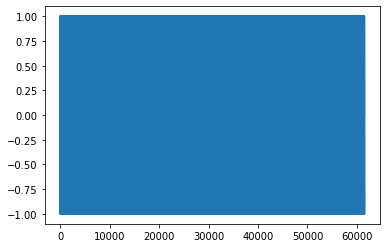

In [21]:
plt.plot(diabetes.loss);

In [22]:
np.sqrt(np.mean((diabetes.predict(X_train) - y_train)**2))

0.5630818918660969

In [23]:
np.sqrt(np.mean((diabetes.predict(X_test) - y_test)**2))

0.6103679378930738

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [25]:
reg.score(X_train, y_train)

0.3029560409340023

In [26]:
reg.score(X_test, y_test)

0.2941453351719068

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?